In [1]:
import numpy as np
import random
import pandas as pd
from datetime import datetime

In [2]:
from twin_graphs_generator import generate_twin_graphs
from ARG import ARG
from graph_matching import pre_compute_compatibility, graph_matching, match_score

In [3]:
def run_graph_matching(size=20, weight_range=1, connected_rate=0.5, noise_rate=0.2):
    M1, M2, V1, V2, idx1, idx2 = generate_twin_graphs(size=size, weight_range=weight_range, connected_rate=connected_rate, noise_rate=noise_rate)
    ARG1 = ARG(M1, V1)
    ARG2 = ARG(M2, V2)
    C_n, C_e = pre_compute_compatibility( ARG1, ARG2, alpha=1, stochastic=0 )
    match_matrix = graph_matching(C_n, C_e)
    final_score = match_score(match_matrix, idx1, idx2)
    return final_score

In [4]:
run_graph_matching(size=20, weight_range=1, connected_rate=0.2, noise_rate=0)

1.0

In [ ]:
# The result should be saved as a dataframe.
size = 20
repeat = 20 
connected_rate_list = [0.2, 0.3, 0.5]
noise_rate_list = [0, 0.1, 0.2, 0.3, 0.5]
acc_mean = np.zeros([len(connected_rate_list), len(noise_rate_list)])
acc_std = np.zeros([len(connected_rate_list), len(noise_rate_list)])
time_mean = np.zeros([len(connected_rate_list), len(noise_rate_list)])
time_std = np.zeros([len(connected_rate_list), len(noise_rate_list)])
for i in range(len(connected_rate_list)):
    for j in range(len(noise_rate_list)):
        acc = np.zeros(repeat)
        time = np.zeros(repeat)
        for rep in range(repeat):
            start = datetime.now()
            acc[rep] = run_graph_matching(size=size, weight_range=1, connected_rate=connected_rate_list[i], noise_rate=noise_rate_list[j])
            end = datetime.now()
            time[rep] = (end-start).seconds
        print(str(end) + ' | ' + 'c_rate: '+ str(connected_rate_list[i]) + ' | ' + 'n_rate: '+ str(noise_rate_list[j]))
        print(str(np.mean(acc))+' | ' + str(np.std(acc)) + ' | ' + str(np.mean(time))+' | ' + str(np.std(time)))    
        acc_mean[i,j] = np.mean(acc)
        acc_std[i,j] = np.std(acc)
        time_mean[i,j] = np.mean(time)
        time_std[i,j] = np.std(time)
acc_mean = pd.DataFrame(acc_mean,columns=noise_rate_list, index=connected_rate_list)
acc_std = pd.DataFrame(acc_std,columns=noise_rate_list, index=connected_rate_list)
time_mean = pd.DataFrame(time_mean,columns=noise_rate_list, index=connected_rate_list)
time_std = pd.DataFrame(time_std,columns=noise_rate_list, index=connected_rate_list)

In [6]:
acc_mean.to_csv("acc_mean_m1.csv")
acc_std.to_csv("acc_std_m1.csv")
time_mean.to_csv("time_mean_m1.csv")
time_std.to_csv("time_std_m1.csv")


In [8]:
import matplotlib.pyplot as plt

In [7]:
acc_mean

,0.0,0.1,0.2,0.3,0.5
0.2,1.0,0.964580,0.875222,0.835395,0.313266
0.3,1.0,0.960188,0.907887,0.817965,0.378039
0.5,1.0,0.994987,0.924188,0.914681,0.477151


In [10]:
x = range(5)

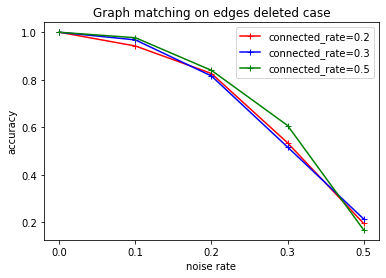

In [20]:

plt.plot(x,acc_mean.iloc[0],label = 'connected_rate=0.2', color = 'r', marker = '+')
plt.plot(x,acc_mean.iloc[1],label = 'connected_rate=0.3', color = 'b', marker = '+')
plt.plot(x,acc_mean.iloc[2],label = 'connected_rate=0.5', color = 'g', marker = '+')
plt.xticks(x, ('0.0','0.1','0.2','0.3','0.5'))
plt.xlabel('noise rate')
plt.ylabel('accuracy')
plt.title('Graph matching on edges deleted case')
plt.legend()
plt.show()

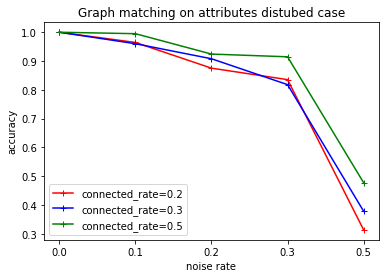

In [11]:

plt.plot(x,acc_mean.iloc[0],label = 'connected_rate=0.2', color = 'r', marker = '+')
plt.plot(x,acc_mean.iloc[1],label = 'connected_rate=0.3', color = 'b', marker = '+')
plt.plot(x,acc_mean.iloc[2],label = 'connected_rate=0.5', color = 'g', marker = '+')
plt.xticks(x, ('0.0','0.1','0.2','0.3','0.5'))
plt.xlabel('noise rate')
plt.ylabel('accuracy')
plt.title('Graph matching on attributes distubed case')
plt.legend()
plt.show()

In [21]:
df = pd.read_csv('time_std_m2.csv',index_col=0) 

In [22]:
pp = np.array(df)

for i in range(3):
    print(connected_rate_list[i], end = '')
    for j in range(5):
        print(' & ' + '%.4f'%pp[i,j], end ='')
    print(' \\\\')
print('\\hline')



0.2 & 0.0000 & 0.3000 & 0.5723 & 0.8529 & 2.3974 \\
0.3 & 0.0000 & 0.4000 & 0.8660 & 4.3715 & 2.4140 \\
0.5 & 0.3000 & 0.4000 & 1.9079 & 2.6944 & 8.1173 \\
\hline
